# Libraries to Install

In [2]:
!pip install pandas numpy matplotlib seaborn sqlite3

ERROR: Could not find a version that satisfies the requirement sqlite3 (from versions: none)
ERROR: No matching distribution found for sqlite3


In [3]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
db_path = r"C:\Users\navab\OneDrive\Desktop\US Trade Flow Exercise\US Trade Flow Exercise\trade.db\trade.db"

In [5]:
conn = sqlite3.connect(db_path)
cursor = conn.cursor()

# Question 1: Describe the data and the structure of the database tables and perform initial data exploration. 

In [7]:
query = "SELECT name FROM sqlite_master WHERE type='table';"
tables = pd.read_sql(query, conn)
print("\n Available Tables:")
print(tables)


 Available Tables:
         name
0  hs_mapping
1  trade_flow


In [8]:
#explore `hs_mapping` Table Structure
query = "PRAGMA table_info(hs_mapping);"
hs_mapping_info = pd.read_sql(query, conn)
print("\n Structure of hs_mapping Table:")
print(hs_mapping_info)


 Structure of hs_mapping Table:
   cid        name    type  notnull dflt_value  pk
0    0       index  BIGINT        0       None   0
1    1  Product ID   FLOAT        0       None   0
2    2      HS6 ID  BIGINT        0       None   0
3    3         HS6    TEXT        0       None   0
4    4      HS4 ID  BIGINT        0       None   0
5    5         HS4    TEXT        0       None   0
6    6      HS2 ID  BIGINT        0       None   0
7    7         HS2    TEXT        0       None   0
8    8  Section ID  BIGINT        0       None   0
9    9     Section    TEXT        0       None   0


In [9]:
#Explore `trade_flow` Table Structure
query = "PRAGMA table_info(trade_flow);"
trade_flow_info = pd.read_sql(query, conn)
print("\n Structure of trade_flow Table:")
print(trade_flow_info)


 Structure of trade_flow Table:
   cid             name  type  notnull dflt_value  pk
0    0         month_id   INT        0       None   0
1    1         state_id  TEXT        0       None   0
2    2       state_name  TEXT        0       None   0
3    3  trade_flow_name  TEXT        0       None   0
4    4       country_id  TEXT        0       None   0
5    5     country_name  TEXT        0       None   0
6    6       product_id   INT        0       None   0
7    7     product_name  TEXT        0       None   0
8    8      trade_value   INT        0       None   0


In [10]:
#Preview first 5 rows of each table
hs_mapping_df = pd.read_sql("SELECT * FROM hs_mapping LIMIT 5;", conn)
trade_flow_df = pd.read_sql("SELECT * FROM trade_flow LIMIT 5;", conn)

In [11]:
print("\n Sample Data from hs_mapping:")
print(hs_mapping_df)


 Sample Data from hs_mapping:
   index  Product ID  HS6 ID  \
0      0   1010121.0   10121   
1      1   1010129.0   10129   
2      2   1010130.0   10130   
3      3   1010190.0   10190   
4      4   1010221.0   10221   

                                                 HS6  HS4 ID     HS4  HS2 ID  \
0           Horses: live, pure-bred breeding animals   10101  Horses     101   
1  Horses: live, other than pure-bred breeding an...   10101  Horses     101   
2                                        Asses: live   10101  Horses     101   
3                            Mules and hinnies: live   10101  Horses     101   
4           Cattle: live, pure-bred breeding animals   10102  Bovine     101   

             HS2  Section ID          Section  
0  Animals; live           1  Animal Products  
1  Animals; live           1  Animal Products  
2  Animals; live           1  Animal Products  
3  Animals; live           1  Animal Products  
4  Animals; live           1  Animal Products  


In [12]:
print("\n Sample Data from trade_flow:")
print(trade_flow_df)


 Sample Data from trade_flow:
   month_id   state_id    state_name trade_flow_name country_id country_name  \
0    202101  04000US42  Pennsylvania         Exports        ita        Italy   
1    202101  04000US42  Pennsylvania         Exports        ita        Italy   
2    202101  04000US42  Pennsylvania         Imports        ita        Italy   
3    202101  04000US42  Pennsylvania         Exports        ita        Italy   
4    202101  04000US42  Pennsylvania         Imports        ita        Italy   

   product_id                                       product_name  trade_value  
0      852321  Magnetic media: cards incorporating a magnetic...        20597  
1      852349  Optical media: recorded, excluding products of...         9574  
2      852349  Optical media: recorded, excluding products of...         5574  
3      852351  Semiconductor media: solid-state non-volatile ...        23920  
4      852380  Media n.e.c. in heading 8523, whether or not r...         4433  


# Question 2: To Calculate Total Import/Export for Each Country

In [14]:
# Query to fetch column names from trade_flow table
query = "PRAGMA table_info(trade_flow);"
trade_flow_columns = pd.read_sql(query, conn)

# Display the column names
print(" Column Names in trade_flow Table:")
print(trade_flow_columns[['name', 'type']])


 Column Names in trade_flow Table:
              name  type
0         month_id   INT
1         state_id  TEXT
2       state_name  TEXT
3  trade_flow_name  TEXT
4       country_id  TEXT
5     country_name  TEXT
6       product_id   INT
7     product_name  TEXT
8      trade_value   INT


In [15]:
query = "SELECT DISTINCT trade_flow_name FROM trade_flow;"
trade_flows = pd.read_sql(query, conn)

print("\n Unique Values in trade_flow_name Column:")
print(trade_flows)



 Unique Values in trade_flow_name Column:
  trade_flow_name
0         Exports
1         Imports


In [17]:
query = "SELECT MIN(trade_value), MAX(trade_value), COUNT(*) FROM trade_flow;"
trade_summary = pd.read_sql(query, conn)

print("\n Trade Value Summary:")
print(trade_summary)



 Trade Value Summary:
   MIN(trade_value)  MAX(trade_value)  COUNT(*)
0                 0        4882207032  46211628


In [18]:
query = """
SELECT 
    country_name, 
    SUM(CASE WHEN TRIM(trade_flow_name) = 'Imports' THEN trade_value ELSE 0 END) AS total_import,
    SUM(CASE WHEN TRIM(trade_flow_name) = 'Exports' THEN trade_value ELSE 0 END) AS total_export
FROM trade_flow
GROUP BY country_name
HAVING total_import > 0 OR total_export > 0
ORDER BY total_import DESC;
"""
country_trade = pd.read_sql(query, conn)

print("\n Total Import/Export for Each Country (Fixed):")
print(country_trade)


 Total Import/Export for Each Country (Fixed):
                    country_name   total_import  total_export
0                          China  1129710197954  328469023015
1                         Mexico   901262859294  646726504030
2                         Canada   850853862032  710712914844
3                          Japan   305119815723  168597846363
4                        Germany   302229228324  148694093562
..                           ...            ...           ...
224  French Southern Territories         200486       6476889
225                     Svalbard         188921       1953226
226                  South Sudan         100295     101533556
227    Saint Pierre and Miquelon          33295         83533
228                  North Korea          29088             0

[229 rows x 3 columns]


# Question 3: Find the Most Frequent Section for Each Country

In [20]:
query = "PRAGMA table_info(hs_mapping);"
hs_mapping_columns = pd.read_sql(query, conn)
print("\n Columns in hs_mapping Table:")
print(hs_mapping_columns)



 Columns in hs_mapping Table:
   cid        name    type  notnull dflt_value  pk
0    0       index  BIGINT        0       None   0
1    1  Product ID   FLOAT        0       None   0
2    2      HS6 ID  BIGINT        0       None   0
3    3         HS6    TEXT        0       None   0
4    4      HS4 ID  BIGINT        0       None   0
5    5         HS4    TEXT        0       None   0
6    6      HS2 ID  BIGINT        0       None   0
7    7         HS2    TEXT        0       None   0
8    8  Section ID  BIGINT        0       None   0
9    9     Section    TEXT        0       None   0


In [21]:
query = """
WITH SectionCount AS (
    SELECT 
        tf.country_name, 
        hs.Section AS section_name, 
        COUNT(*) AS section_count
    FROM trade_flow tf
    JOIN hs_mapping hs 
    ON tf.product_id = hs."Product ID"  
    GROUP BY tf.country_name, hs.Section
)
SELECT country_name, section_name
FROM (
    SELECT country_name, section_name, 
           RANK() OVER (PARTITION BY country_name ORDER BY section_count DESC) AS rank
    FROM SectionCount
) WHERE rank = 1;
"""
most_frequent_section = pd.read_sql(query, conn)

print("\n Most Frequent Section for Each Country:")
print(most_frequent_section)



 Most Frequent Section for Each Country:
            country_name       section_name
0              Argentina  Chemical Products
1                Armenia  Chemical Products
2                  Aruba  Chemical Products
3              Australia  Chemical Products
4                Austria    Animal Products
..                   ...                ...
82               Ukraine  Chemical Products
83  United Arab Emirates  Chemical Products
84        United Kingdom  Chemical Products
85             Venezuela  Chemical Products
86               Vietnam      Wood Products

[87 rows x 2 columns]


# Question 4: How do the imports change from 2021 to 2022 for the US?

In [23]:
#checking unique years with month id
query = "SELECT DISTINCT month_id FROM trade_flow LIMIT 10;"
pd.read_sql(query, conn)


,month_id
0,202101
1,202102
2,202103
3,202104
4,202105
5,202106
6,202107
7,202108
8,202109
9,202110


In [24]:
query = """
SELECT DISTINCT SUBSTR(month_id, 1, 4) AS year
FROM trade_flow
ORDER BY year;
"""
available_years = pd.read_sql(query, conn)
print("\n Available Years in the Dataset:")
print(available_years)



 Available Years in the Dataset:
   year
0  2021
1  2022


In [25]:
query = """
SELECT DISTINCT trade_flow_name
FROM trade_flow;
"""
trade_flow_types = pd.read_sql(query, conn)
print("\n Available Trade Flow Categories:")
print(trade_flow_types)



 Available Trade Flow Categories:
  trade_flow_name
0         Exports
1         Imports


In [26]:
query = """
SELECT 
    CAST(SUBSTR(month_id, 1, 4) AS INT) AS year,
    SUM(trade_value) AS total_imports
FROM trade_flow
WHERE country_name LIKE '%United%'  
AND trade_flow_name LIKE '%Import%'  
AND SUBSTR(month_id, 1, 4) IN ('2021', '2022')
GROUP BY year
ORDER BY year;
"""

# Run Query
us_imports = pd.read_sql(query, conn)

# Display Result
print("\n US Imports in 2021 & 2022:")
print(us_imports)

# Calculate Percentage Change if Both Years Exist
if len(us_imports) == 2:
    change = ((us_imports['total_imports'][1] - us_imports['total_imports'][0]) / us_imports['total_imports'][0]) * 100
    print(f"\n Imports change from 2021 to 2022: {change:.2f}%")
else:
    print("\n Data missing for one of the years.")



 US Imports in 2021 & 2022:
   year  total_imports
0  2021    77606311556
1  2022    64887725746

 Imports change from 2021 to 2022: -16.39%


# Question 5: How do the exports change from 2021 to 2022 for the US?

In [28]:
query = """
SELECT 
    CAST(SUBSTR(month_id, 1, 4) AS INT) AS year,
    SUM(trade_value) AS total_exports
FROM trade_flow
WHERE country_name LIKE '%United%'  
AND trade_flow_name LIKE '%Export%'  
AND SUBSTR(month_id, 1, 4) IN ('2021', '2022')
GROUP BY year
ORDER BY year;
"""

# Run Query for exports
us_exports = pd.read_sql(query, conn)

# Display Result
print("\n US Exports in 2021 & 2022:")
print(us_exports)

# Calculate Percentage Change if Both Years Exist
if len(us_exports) == 2:
    change = ((us_exports['total_exports'][1] - us_exports['total_exports'][0]) / us_exports['total_exports'][0]) * 100
    print(f"\n Exports change from 2021 to 2022: {change:.2f}%")
else:
    print("\n Data missing for one of the years.")


 US Exports in 2021 & 2022:
   year  total_exports
0  2021    99025713011
1  2022    88560637966

 Exports change from 2021 to 2022: -10.57%


# Question 6: Plot import and export on a country level for 2022.

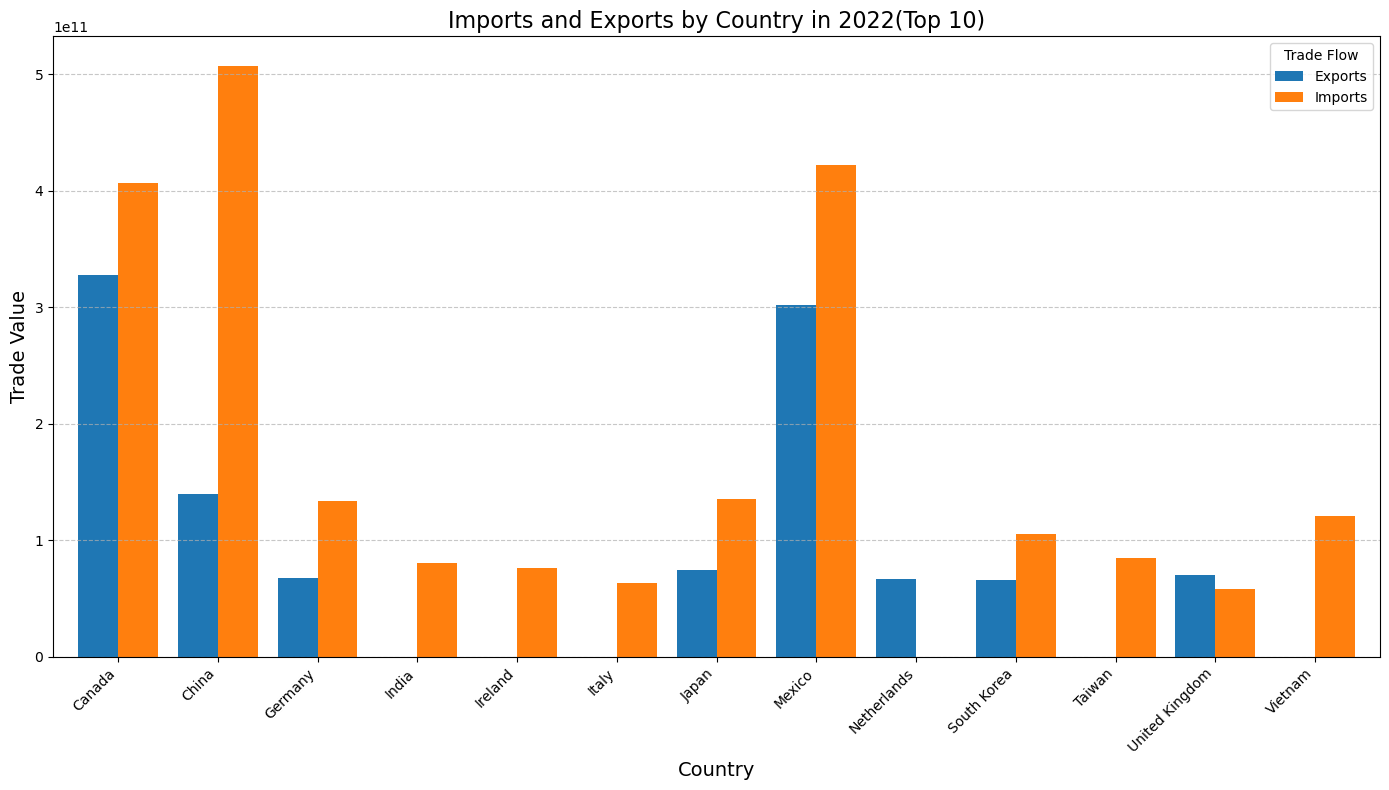

In [30]:
# SQL Query for Imports and Exports by country in 2022 (plotted top 10 based on trade value)
query = """
SELECT
    country_name,
    trade_flow_name,
    SUM(trade_value) AS total_trade_value
FROM trade_flow
WHERE SUBSTR(month_id, 1, 4) = '2022'
GROUP BY country_name, trade_flow_name
ORDER BY SUM(trade_value) DESC
LIMIT 20;
"""

# Execute the query
data_2022 = pd.read_sql(query, conn)

# Pivot DataFrame to have Imports and Exports in separate columns
trade_pivot = data_2022.pivot(index='country_name', columns='trade_flow_name', values='total_trade_value').fillna(0)

# Plotting
trade_pivot.plot(kind='bar', figsize=(14, 8), width=0.8)

# Adding titles and labels
plt.title('Imports and Exports by Country in 2022(Top 10)', fontsize=16)
plt.xlabel('Country', fontsize=14)
plt.ylabel('Trade Value', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Trade Flow')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show Plot
plt.show()